# Project NBA  - Geo Analysis



* This work is investigating amount of NBA players born in different states and cities

* Data about 1200 NBA players birth cities was analyzed, then filtering for cities counting at least 5 NBA players, and states counting > 10 NBA players

* Count per state showed that the highest number of NBA players originated from California

* Count per cities showed that majority number of NBA players originated from Chicago and East Coast areas of US



In [1]:
# Dependencies and Setup
import pandas as pd
import csv
import os


# File to Load (change path, if needed)

AllPos_players_data = "output/AllPos_player_mean.csv" 
players = "Resources/Players.csv"
player_data = "Resources/player_data.csv"


In [2]:
# Reading and Mergeing two data sets for NBA players

players_df = pd.read_csv(players, low_memory=False)
del players_df['Unnamed: 0']
players_df


,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [3]:
players_df = players_df.rename(columns={"collage":"college"})
players_df.head()

,Player,height,weight,college,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [4]:
players_df['birth_city'].value_counts()

Chicago           114
Los Angeles        88
Philadelphia       83
Brooklyn           76
New York           71
                 ... 
Osecola             1
Havre De Grace      1
Freehold            1
Doboj               1
South Gate          1
Name: birth_city, Length: 1264, dtype: int64

In [5]:
player_data_df = pd.read_csv(player_data, low_memory=False)
player_data_df


,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


In [6]:
player_data_df = player_data_df.rename(columns={"name":"Player", "position":"Career position"})
player_data_df.head()


,Player,year_start,year_end,Career position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [7]:
all_players_data_df = pd.merge(player_data_df, players_df, how = 'left', on=['Player', 'college'])
all_players_data_df


,Player,year_start,year_end,Career position,height_x,weight_x,birth_date,college,height_y,weight_y,born,birth_city,birth_state
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,208.0,108.0,1968.0,Cairo,Egypt
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,206.0,106.0,1946.0,Brooklyn,New York
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",NaN,NaN,NaN,NaN,NaN
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,NaN,NaN,NaN,NaN,NaN
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,198.0,101.0,1974.0,Maisons Alfort,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN,NaN,NaN,NaN,NaN,NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University,216.0,108.0,1953.0,Uxbridge,Canada
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University,185.0,77.0,1948.0,NaN,NaN
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN,216.0,120.0,1997.0,Mostar,Bosnia and Herzegovina


In [19]:
# all_players_data_df = all_players_data_df.dropna()
# all_players_data_df


In [8]:
all_players_data_df = all_players_data_df.rename(columns={
    "height_x":"Height (ft-in)", 
    "weight_x":"Weight (lb)",
    "height_y":"Height (cm)",
    "weight_y":"Weight (kg)",
    
    
})
all_players_data_df.head()


,Player,year_start,year_end,Career position,Height (ft-in),Weight (lb),birth_date,college,Height (cm),Weight (kg),born,birth_city,birth_state
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,208.0,108.0,1968.0,Cairo,Egypt
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,206.0,106.0,1946.0,Brooklyn,New York
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",NaN,NaN,NaN,NaN,NaN
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,NaN,NaN,NaN,NaN,NaN
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,198.0,101.0,1974.0,Maisons Alfort,France


In [9]:
all_players_data_df['Years_played'] = all_players_data_df['year_end'] - all_players_data_df['year_start']
del all_players_data_df['born']
all_players_data_df = all_players_data_df.reset_index(drop=True)
all_players_data_df


,Player,year_start,year_end,Career position,Height (ft-in),Weight (lb),birth_date,college,Height (cm),Weight (kg),birth_city,birth_state,Years_played
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,208.0,108.0,Cairo,Egypt,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,206.0,106.0,Brooklyn,New York,9
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",NaN,NaN,NaN,NaN,19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,NaN,NaN,NaN,NaN,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,198.0,101.0,Maisons Alfort,France,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN,NaN,NaN,NaN,NaN,0
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University,216.0,108.0,Uxbridge,Canada,0
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University,185.0,77.0,NaN,NaN,0
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN,216.0,120.0,Mostar,Bosnia and Herzegovina,1


In [10]:
len(all_players_data_df['Player'].unique())


4500

In [11]:
len(all_players_data_df['Player'])


4550

In [12]:
players_geo_birth = all_players_data_df[['Player', 'birth_date', 'birth_city', 'birth_state']].dropna()
players_geo_birth = players_geo_birth.reset_index(drop=True)
players_geo_birth.head()

,Player,birth_date,birth_city,birth_state
0,Alaa Abdelnaby,"June 24, 1968",Cairo,Egypt
1,Zaid Abdul-Aziz,"April 7, 1946",Brooklyn,New York
2,Tariq Abdul-Wahad,"November 3, 1974",Maisons Alfort,France
3,Shareef Abdur-Rahim,"December 11, 1976",Marietta,Georgia
4,Tom Abernethy,"May 6, 1954",South Bend,Indiana


In [13]:
len(players_geo_birth)

3154



^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
* Data retrieval from gmaps. Skip to csv data read line 

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sn

from scipy.stats import linregress

import requests
import json
import gmaps

# Import API key
from api_keys import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)


In [15]:
players_geo_birth.head()


,Player,birth_date,birth_city,birth_state
0,Alaa Abdelnaby,"June 24, 1968",Cairo,Egypt
1,Zaid Abdul-Aziz,"April 7, 1946",Brooklyn,New York
2,Tariq Abdul-Wahad,"November 3, 1974",Maisons Alfort,France
3,Shareef Abdur-Rahim,"December 11, 1976",Marietta,Georgia
4,Tom Abernethy,"May 6, 1954",South Bend,Indiana


In [16]:
# Empty Data Frame
players_geo_birth = pd.DataFrame(all_players_data_df[['Player', 'birth_date', 'birth_city', 'birth_state']])

players_geo_birth ["Lat_bcity"] = ""
players_geo_birth ["Lng_bcity"] = ""

players_geo_birth.head()

,Player,birth_date,birth_city,birth_state,Lat_bcity,Lng_bcity
0,Alaa Abdelnaby,"June 24, 1968",Cairo,Egypt,,
1,Zaid Abdul-Aziz,"April 7, 1946",Brooklyn,New York,,
2,Kareem Abdul-Jabbar,"April 16, 1947",NaN,NaN,,
3,Mahmoud Abdul-Rauf,"March 9, 1969",NaN,NaN,,
4,Tariq Abdul-Wahad,"November 3, 1974",Maisons Alfort,France,,


In [151]:
# Data retrieval from Gmaps. skip to the line to read ready csv file

params = {"key": gkey}

print('Beginning data retrieval')
print('--'*50)

# Loop through the palyers data and run a lat/long search for each city

for index, row in players_geo_birth.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['city_name']
    state = row['birth_state']

    # update address key value
    params['address'] = f"{city},{state}"
    print(f"Processing birth_city record {index} | {city}")

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    try:
        players_geo_birth.loc[index, "Lat_bcity"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]                                         
        players_geo_birth.loc[index, "Lng_bcity"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
    
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print('--'*50)
print ('Done')

Beginning data retrieval
----------------------------------------------------------------------------------------------------
Processing birt_city record 0 | Cairo
Processing birt_city record 1 | Brooklyn
Processing birt_city record 2 | Maisons Alfort
Processing birt_city record 3 | Marietta
Processing birt_city record 4 | South Bend
Processing birt_city record 5 | Palma de Mallorca
Processing birt_city record 6 | Compton
Processing birt_city record 7 | New York
Processing birt_city record 8 | Inglewood
Processing birt_city record 9 | Tyler
Processing birt_city record 10 | Lawrence
Processing birt_city record 11 | Atlanta
Processing birt_city record 12 | Inglewood
Processing birt_city record 13 | Atlanta
Processing birt_city record 14 | Hartford
Processing birt_city record 15 | Rotorua
Processing birt_city record 16 | Jersey City
Processing birt_city record 17 | Lynwood
Processing birt_city record 18 | Brookline
Processing birt_city record 19 | Los Angeles
Processing birt_city record 2

Processing birt_city record 190 | Ellensburg
Processing birt_city record 191 | Memphis
Processing birt_city record 192 | Philadelphia
Processing birt_city record 193 | Memphis
Processing birt_city record 194 | New York
Processing birt_city record 195 | Rockford
Processing birt_city record 196 | Bologna
Processing birt_city record 197 | Flint
Processing birt_city record 198 | Cincinnati
Processing birt_city record 199 | St. Croix
Processing birt_city record 200 | Minneapolis
Processing birt_city record 201 | Monticello
Processing birt_city record 202 | Charlotte
Processing birt_city record 203 | Columbia
Processing birt_city record 204 | Capljina
Processing birt_city record 205 | Picayune
Processing birt_city record 206 | Warrenton
Processing birt_city record 207 | Monroe
Processing birt_city record 208 | Compton
Processing birt_city record 209 | Toronto
Processing birt_city record 210 | Evanston
Processing birt_city record 211 | Denton
Processing birt_city record 212 | Pittsburgh
Proce

Processing birt_city record 378 | Iowa
Processing birt_city record 379 | Chicago
Processing birt_city record 380 | Midlothian
Processing birt_city record 381 | New Orleans
Processing birt_city record 382 | Syracuse
Processing birt_city record 383 | Santa Fe
Processing birt_city record 384 | Chicago
Processing birt_city record 385 | Philadelphia
Processing birt_city record 386 | Philadelphia
Processing birt_city record 387 | Glen Ridge
Processing birt_city record 388 | Madrid
Processing birt_city record 389 | Oslo
Processing birt_city record 390 | London
Processing birt_city record 391 | Yazoo City
Processing birt_city record 392 | Hopkinsville
Processing birt_city record 393 | Phoenix
Processing birt_city record 394 | Woodbury
Processing birt_city record 395 | Encinitas
Processing birt_city record 396 | Kearney
Processing birt_city record 397 | San Diego
Processing birt_city record 398 | Milwaukee
Processing birt_city record 399 | Des Moines
Processing birt_city record 400 | Baltimore


Processing birt_city record 566 | Los Angeles
Processing birt_city record 567 | Lincoln
Processing birt_city record 568 | Los Angeles
Processing birt_city record 569 | West Covina
Processing birt_city record 570 | Chicago
Processing birt_city record 571 | Brooklyn
Processing birt_city record 572 | Washington
Processing birt_city record 573 | Sacramento
Processing birt_city record 574 | Evanston
Processing birt_city record 575 | Benton Harbor
Processing birt_city record 576 | Houston
Processing birt_city record 577 | Los Angeles
Processing birt_city record 578 | Milan
Processing birt_city record 579 | Robbinsdale
Processing birt_city record 580 | Orange
Processing birt_city record 581 | Trenton
Processing birt_city record 582 | Atlanta
Processing birt_city record 583 | Columbia
Processing birt_city record 584 | Coral Gables
Processing birt_city record 585 | Arlington Heights
Processing birt_city record 586 | Minoa
Processing birt_city record 587 | Tucson
Processing birt_city record 588 

Processing birt_city record 756 | Pahokee
Processing birt_city record 757 | Indianapolis
Processing birt_city record 758 | Long Island City
Processing birt_city record 759 | Baltimore
Processing birt_city record 760 | Ljubljana
Processing birt_city record 761 | Ljubljana
Processing birt_city record 762 | Wichita
Processing birt_city record 763 | Baton Rouge
Processing birt_city record 764 | Vredenburgh
Processing birt_city record 765 | Kansas City
Processing birt_city record 766 | Chicago
Processing birt_city record 767 | Winthrop
Processing birt_city record 768 | Bijelo Polje
Processing birt_city record 769 | La Mesa
Processing birt_city record 770 | Mount Vernon
Processing birt_city record 771 | Harvey
Processing birt_city record 772 | Harrisburg
Processing birt_city record 773 | San Diego
Processing birt_city record 774 | Royal Oak
Processing birt_city record 775 | Mamou
Processing birt_city record 776 | Split
Processing birt_city record 777 | Rochester
Processing birt_city record 7

Processing birt_city record 943 | Battle Ground
Processing birt_city record 944 | Silver Spring
Processing birt_city record 945 | Gary
Processing birt_city record 946 | Moreno Valley
Processing birt_city record 947 | Houston
Processing birt_city record 948 | Minden
Processing birt_city record 949 | Los Angeles
Processing birt_city record 950 | Glens Falls
Processing birt_city record 951 | Farnham
Processing birt_city record 952 | Madison
Processing birt_city record 953 | Overland Park
Processing birt_city record 954 | Chicago
Processing birt_city record 955 | White Plains
Processing birt_city record 956 | Bellingham
Processing birt_city record 957 | East St. Louis
Processing birt_city record 958 | Detroit
Processing birt_city record 959 | Columbus
Processing birt_city record 960 | Flint
Processing birt_city record 961 | Den Haag
Processing birt_city record 962 | Wow
Processing birt_city record 963 | Chicago
Processing birt_city record 964 | Los Angeles
Processing birt_city record 965 |

Processing birt_city record 1127 | Milwaukee
Processing birt_city record 1128 | Chihuahua
Processing birt_city record 1129 | Mount Vernon
Processing birt_city record 1130 | Ahvaz
Processing birt_city record 1131 | Terre Haute
Processing birt_city record 1132 | Sanford
Processing birt_city record 1133 | Winston-Salem
Processing birt_city record 1134 | Detroit
Processing birt_city record 1135 | Detroit
Processing birt_city record 1136 | Lewisburg
Processing birt_city record 1137 | Albany
Processing birt_city record 1138 | Medford
Processing birt_city record 1139 | Long Beach
Processing birt_city record 1140 | Tampa
Processing birt_city record 1141 | Chicago
Processing birt_city record 1142 | Saginaw
Processing birt_city record 1143 | Memphis
Processing birt_city record 1144 | Huntington Beach
Processing birt_city record 1145 | Newport Beach
Processing birt_city record 1146 | Coatesville
Processing birt_city record 1147 | Los Angeles
Processing birt_city record 1148 | Columbia
Processing 

Processing birt_city record 1311 | Hopkinsville
Processing birt_city record 1312 | Montgomery
Processing birt_city record 1313 | Puerto Plata
Processing birt_city record 1314 | LaRomana
Processing birt_city record 1315 | Marion
Processing birt_city record 1316 | Elmhurst
Processing birt_city record 1317 | Linwood
Processing birt_city record 1318 | Andalusia
Processing birt_city record 1319 | Springfield
Processing birt_city record 1320 | Dayton
Processing birt_city record 1321 | Houston
Processing birt_city record 1322 | Berkeley
Processing birt_city record 1323 | Louisville
Processing birt_city record 1324 | Watonga
Processing birt_city record 1325 | Durango
Processing birt_city record 1326 | Winston-Salem
Processing birt_city record 1327 | Atlanta
Processing birt_city record 1328 | Pittsburgh
Processing birt_city record 1329 | Winston-Salem
Processing birt_city record 1330 | Chicago
Processing birt_city record 1331 | Philadelphia
Processing birt_city record 1332 | Oak Ridge
Processin

Processing birt_city record 1494 | Alexandria
Processing birt_city record 1495 | Portland
Processing birt_city record 1496 | Burnsville
Processing birt_city record 1497 | Brooklyn
Processing birt_city record 1498 | Houston
Processing birt_city record 1499 | Washington
Processing birt_city record 1500 | Kingston
Processing birt_city record 1501 | Chicago
Processing birt_city record 1502 | Baltimore
Processing birt_city record 1503 | Perry
Processing birt_city record 1504 | Lakeport
Processing birt_city record 1505 | Toronto
Processing birt_city record 1506 | Roseau
Processing birt_city record 1507 | Montreal
Processing birt_city record 1508 | Cap-Haitian
Processing birt_city record 1509 | Salt Lake City
Processing birt_city record 1510 | New York
Processing birt_city record 1511 | Wyoming
Processing birt_city record 1512 | Winfield
Processing birt_city record 1513 | Zurich
Processing birt_city record 1514 | Long Beach
Processing birt_city record 1515 | St. Petersburg
Processing birt_cit

Processing birt_city record 1678 | Detroit
Processing birt_city record 1679 | Belleville
Processing birt_city record 1680 | Los Angeles
Processing birt_city record 1681 | Woodbridge
Processing birt_city record 1682 | Niles
Processing birt_city record 1683 | Atlanta
Processing birt_city record 1684 | Canton
Processing birt_city record 1685 | Pensacola
Processing birt_city record 1686 | Long Lake
Processing birt_city record 1687 | Brooklyn
Processing birt_city record 1688 | Pine Bluff
Processing birt_city record 1689 | Columbus
Processing birt_city record 1690 | San Diego
Processing birt_city record 1691 | Washington
Processing birt_city record 1692 | Brooklyn
Processing birt_city record 1693 | Liberal
Processing birt_city record 1694 | Little Rock
Processing birt_city record 1695 | Philadelphia
Processing birt_city record 1696 | Baltimore
Processing birt_city record 1697 | Chicago
Processing birt_city record 1698 | Walnut Creek
Processing birt_city record 1699 | Chicago
Processing birt_

Processing birt_city record 1862 | Chesterton
Processing birt_city record 1863 | Flint
Processing birt_city record 1864 | Tyler
Processing birt_city record 1865 | San Angelo
Processing birt_city record 1866 | Indianapolis
Processing birt_city record 1867 | Franklin
Processing birt_city record 1868 | Bartow
Processing birt_city record 1869 | Landover
Processing birt_city record 1870 | San Diego
Processing birt_city record 1871 | Racine
Processing birt_city record 1872 | Charlotte
Processing birt_city record 1873 | Detroit
Processing birt_city record 1874 | St. Paul
Processing birt_city record 1875 | Camden
Processing birt_city record 1876 | Miami
Processing birt_city record 1877 | Meridian
Processing birt_city record 1878 | Philadelphia
Processing birt_city record 1879 | Waukegan
Processing birt_city record 1880 | Lowlands
Processing birt_city record 1881 | San Diego
Processing birt_city record 1882 | St. Louis
Processing birt_city record 1883 | Houston
Processing birt_city record 1884 

Processing birt_city record 2047 | Nova Varos
Processing birt_city record 2048 | Oakland
Processing birt_city record 2049 | Chester
Processing birt_city record 2050 | Los Angeles
Processing birt_city record 2051 | Bronx
Processing birt_city record 2052 | Cairo
Processing birt_city record 2053 | Columbus
Processing birt_city record 2054 | Ljubljana
Processing birt_city record 2055 | Belo Horizonte
Processing birt_city record 2056 | Memphis
Processing birt_city record 2057 | Cortez
Processing birt_city record 2058 | Toledo
Processing birt_city record 2059 | Sedalia
Processing birt_city record 2060 | Southfield
Processing birt_city record 2061 | Portland
Processing birt_city record 2062 | Danville
Processing birt_city record 2063 | Brooklyn
Processing birt_city record 2064 | Lawrence
Processing birt_city record 2065 | Boston
Processing birt_city record 2066 | Mississauga
Processing birt_city record 2067 | Osecola
Processing birt_city record 2068 | Chicago
Processing birt_city record 2069 

Processing birt_city record 2232 | East Peoria
Processing birt_city record 2233 | Chicago
Processing birt_city record 2234 | Queens
Processing birt_city record 2235 | Vicksburg
Processing birt_city record 2236 | Birmingham
Processing birt_city record 2237 | Quincy
Processing birt_city record 2238 | Baton Rouge
Processing birt_city record 2239 | Steubenville
Processing birt_city record 2240 | Oakland
Processing birt_city record 2241 | Dallas
Processing birt_city record 2242 | Huntsville
Processing birt_city record 2243 | Les Abymes
Processing birt_city record 2244 | Sheridan
Processing birt_city record 2245 | Bronx
Processing birt_city record 2246 | Colton
Processing birt_city record 2247 | Hartford
Processing birt_city record 2248 | West Chester
Processing birt_city record 2249 | Rocky Mount
Processing birt_city record 2250 | Rosenberg
Processing birt_city record 2251 | Mostar
Processing birt_city record 2252 | Bergisch Gladbach
Processing birt_city record 2253 | Fort Wayne
Processing 

Processing birt_city record 2416 | New York
Processing birt_city record 2417 | Tenerife
Processing birt_city record 2418 | Atlantic City
Processing birt_city record 2419 | Detroit
Processing birt_city record 2420 | Fullerton
Processing birt_city record 2421 | St. Louis
Processing birt_city record 2422 | Durham
Processing birt_city record 2423 | Charlestown
Processing birt_city record 2424 | Wickliffe
Processing birt_city record 2425 | Winter Haven
Processing birt_city record 2426 | South Gate
Processing birt_city record 2427 | Louisville
Processing birt_city record 2428 | New York
Processing birt_city record 2429 | Chicago
Processing birt_city record 2430 | Detroit
Processing birt_city record 2431 | Philadelphia
Processing birt_city record 2432 | Rochester
Processing birt_city record 2433 | New York
Processing birt_city record 2434 | Dallas
Processing birt_city record 2435 | Portland
Processing birt_city record 2436 | Knoxville
Processing birt_city record 2437 | Cleveland
Processing bi

Processing birt_city record 2600 | Chicago
Processing birt_city record 2601 | Memphis
Processing birt_city record 2602 | McMinnville
Processing birt_city record 2603 | Seattle
Processing birt_city record 2604 | LaPorte
Processing birt_city record 2605 | Mount Vernon
Processing birt_city record 2606 | Temple
Processing birt_city record 2607 | Berlin
Processing birt_city record 2608 | Duluth
Processing birt_city record 2609 | Houston
Processing birt_city record 2610 | Los Angeles
Processing birt_city record 2611 | Beckley
Processing birt_city record 2612 | Shreveport
Processing birt_city record 2613 | Ljubljana
Processing birt_city record 2614 | Washington
Processing birt_city record 2615 | Baton Rouge
Processing birt_city record 2616 | Flower Mound
Processing birt_city record 2617 | Golden Valley
Processing birt_city record 2618 | Sandwich
Processing birt_city record 2619 | Farmington
Processing birt_city record 2620 | Bridgeport
Processing birt_city record 2621 | Cleveland
Processing b

Processing birt_city record 2784 | Brooklyn
Processing birt_city record 2785 | Columbia
Processing birt_city record 2786 | Detroit
Processing birt_city record 2787 | Paterson
Processing birt_city record 2788 | Baton Rouge
Processing birt_city record 2789 | Phoenix
Processing birt_city record 2790 | Camden
Processing birt_city record 2791 | Dallas
Processing birt_city record 2792 | Middletown
Processing birt_city record 2793 | Los Angeles
Processing birt_city record 2794 | Brooklyn
Processing birt_city record 2795 | Pasadena
Processing birt_city record 2796 | Winston-Salem
Processing birt_city record 2797 | Los Angeles
Processing birt_city record 2798 | Cincinnati
Processing birt_city record 2799 | Nassau
Processing birt_city record 2800 | Smyrna
Processing birt_city record 2801 | Los Angeles
Processing birt_city record 2802 | Toronto
Processing birt_city record 2803 | Princeton
Processing birt_city record 2804 | Perry
Processing birt_city record 2805 | Los Angeles
Processing birt_city 

Processing birt_city record 2969 | Kansas City
Processing birt_city record 2970 | Elm City
Processing birt_city record 2971 | Rolling Ford
Processing birt_city record 2972 | Philadelphia
Processing birt_city record 2973 | Long Beach
Processing birt_city record 2974 | Long Beach
Processing birt_city record 2975 | Crawford
Processing birt_city record 2976 | Greenwood
Processing birt_city record 2977 | Janesville
Processing birt_city record 2978 | Montgomery
Processing birt_city record 2979 | Dallas
Processing birt_city record 2980 | Detroit
Processing birt_city record 2981 | Chesapeake
Processing birt_city record 2982 | Pine Bluff
Processing birt_city record 2983 | Baltimore
Processing birt_city record 2984 | Harper
Processing birt_city record 2985 | West Memphis
Processing birt_city record 2986 | Orefield
Processing birt_city record 2987 | Easton
Processing birt_city record 2988 | Muncie
Processing birt_city record 2989 | Russellville
Processing birt_city record 2990 | Providence
Proces

Processing birt_city record 3152 | Uxbridge
Processing birt_city record 3153 | Mostar
Processing birt_city record 3154 | 0
City not found. Skipping...
Processing birt_city record 3155 | 0
City not found. Skipping...
Processing birt_city record 3156 | 0
City not found. Skipping...
Processing birt_city record 3157 | 0
City not found. Skipping...
Processing birt_city record 3158 | 0
City not found. Skipping...
Processing birt_city record 3159 | 0
City not found. Skipping...
----------------------------------------------------------------------------------------------------
Done


In [152]:
players_geo_birth

,Player,birth_date,birth_city,birth_state,Lat_bcity,Lng_bcity
0,Alaa Abdelnaby,"June 24, 1968",Cairo,Egypt,30.044420,31.235712
1,Zaid Abdul-Aziz,"April 7, 1946",Brooklyn,New York,40.678178,-73.944158
2,Tariq Abdul-Wahad,"November 3, 1974",Maisons Alfort,France,48.801148,2.429443
3,Shareef Abdur-Rahim,"December 11, 1976",Marietta,Georgia,33.952602,-84.549933
4,Tom Abernethy,"May 6, 1954",South Bend,Indiana,41.676355,-86.251990
...,...,...,...,...,...,...
3155,0,0,0,0,0.000000,0.000000
3156,0,0,0,0,0.000000,0.000000
3157,0,0,0,0,0.000000,0.000000
3158,0,0,0,0,0.000000,0.000000


In [153]:
players_geo_birth.to_csv("output/players_geo_birth_bu.csv")

In [154]:
players_geo_birth = players_geo_birth.dropna()
#players_geo_birth = players_geo_birth.reset_index(drop=True)
len(players_geo_birth)


3158

In [157]:
players_geo_birth = players_geo_birth.loc[~(players_geo_birth==0).all(axis=1)]
len(players_geo_birth)

3152

In [158]:
players_geo_birth.to_csv("output/players_geo_birth.csv")


In [17]:
players_geo_birth = pd.read_csv("output/players_geo_birth.csv")
players_geo_birth.head()


,Unnamed: 0,Player,birth_date,birth_city,birth_state,Lat_bcity,Lng_bcity
0,0,Alaa Abdelnaby,"June 24, 1968",Cairo,Egypt,30.044420,31.235712
1,1,Zaid Abdul-Aziz,"April 7, 1946",Brooklyn,New York,40.678178,-73.944158
2,2,Tariq Abdul-Wahad,"November 3, 1974",Maisons Alfort,France,48.801148,2.429443
3,3,Shareef Abdur-Rahim,"December 11, 1976",Marietta,Georgia,33.952602,-84.549933
4,4,Tom Abernethy,"May 6, 1954",South Bend,Indiana,41.676354,-86.251990


In [18]:
del players_geo_birth['Unnamed: 0']
players_geo_birth.head()

,Player,birth_date,birth_city,birth_state,Lat_bcity,Lng_bcity
0,Alaa Abdelnaby,"June 24, 1968",Cairo,Egypt,30.044420,31.235712
1,Zaid Abdul-Aziz,"April 7, 1946",Brooklyn,New York,40.678178,-73.944158
2,Tariq Abdul-Wahad,"November 3, 1974",Maisons Alfort,France,48.801148,2.429443
3,Shareef Abdur-Rahim,"December 11, 1976",Marietta,Georgia,33.952602,-84.549933
4,Tom Abernethy,"May 6, 1954",South Bend,Indiana,41.676354,-86.251990


In [19]:
len(players_geo_birth['Player'])

3152

In [20]:
players_state = players_geo_birth['birth_state'].value_counts()
players_state

California                  317
New York                    251
Illinois                    197
Pennsylvania                146
Ohio                        127
                           ... 
Luxembourg                    1
Bulgaria                      1
Islamic Republic of Iran      1
Japan                         1
FYR Macedonia                 1
Name: birth_state, Length: 127, dtype: int64

In [21]:
players_state = players_state.to_dict()
players_state_df = pd.DataFrame(players_state.keys())
players_state_df['state_count'] = players_state.values()
players_state_df.head()

,0,state_count
0,California,317
1,New York,251
2,Illinois,197
3,Pennsylvania,146
4,Ohio,127


In [22]:
players_state_df = players_state_df.rename(columns={0:"state"})
players_state_df.head()

,state,state_count
0,California,317
1,New York,251
2,Illinois,197
3,Pennsylvania,146
4,Ohio,127


In [23]:
players_state_df = players_state_df.set_index('state')
players_state_df

,state_count
state,
California,317
New York,251
Illinois,197
Pennsylvania,146
Ohio,127
...,...
Luxembourg,1
Bulgaria,1
Islamic Republic of Iran,1


In [24]:
players_state_dec_df = players_state_df.loc[(players_state_df['state_count'] > 10)]
players_state_dec_df.head()

,state_count
state,
California,317
New York,251
Illinois,197
Pennsylvania,146
Ohio,127


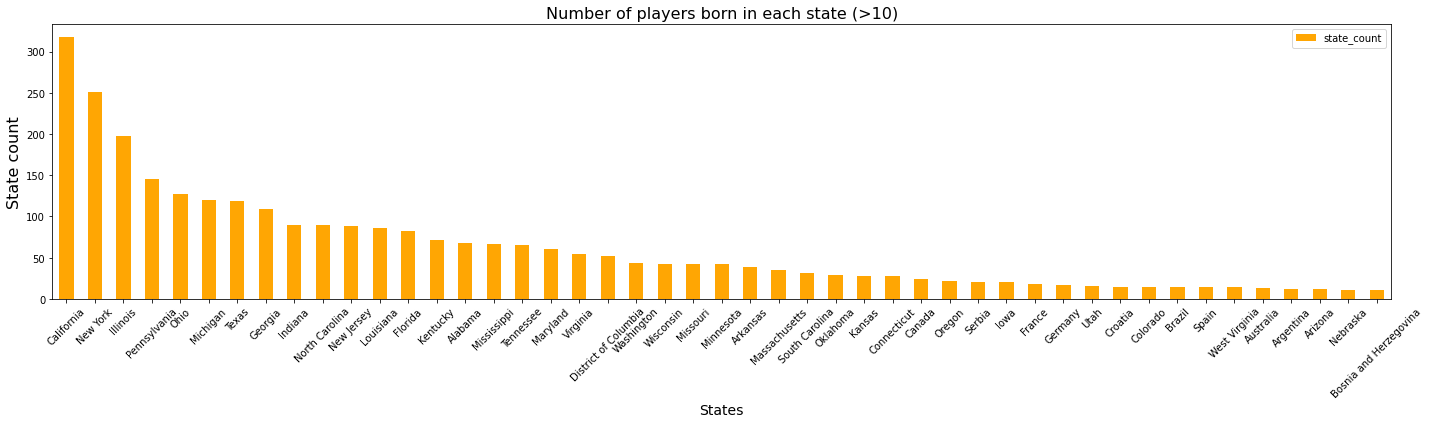

In [25]:
players_state_dec_df.plot.bar(rot=45, color='orange', alpha=0.99, figsize=(20,6))
plt.title("Number of players born in each state (>10)", fontsize=16)
plt.xlabel("States", fontsize=14)
plt.ylabel("State count", fontsize=16)
plt.tight_layout()

fig_name = "Players_count_state>10"
plt.savefig(f"output/{fig_name}.png")

In [26]:
Lat_bcity_count = players_geo_birth['Lat_bcity'].value_counts().to_dict()
Lat_cities_count = pd.DataFrame(Lat_bcity_count.keys())
Lat_cities_count

,0
0,41.878114
1,34.052234
2,39.952584
3,40.678178
4,40.712775
...,...
1301,34.887940
1302,37.621713
1303,40.058324
1304,47.427155


In [27]:
Lat_cities_count = Lat_cities_count.rename(columns={0:"Lat_bcity"})
Lat_cities_count.head()

,Lat_bcity
0,41.878114
1,34.052234
2,39.952584
3,40.678178
4,40.712775


In [28]:
Lat_cities_count['bcity_count'] = Lat_bcity_count.values()
Lat_cities_count.head()

,Lat_bcity,bcity_count
0,41.878114,109
1,34.052234,81
2,39.952584,77
3,40.678178,63
4,40.712775,58


In [29]:
Lat_cities_count['bcity_count']

0       109
1        81
2        77
3        63
4        58
       ... 
1301      1
1302      1
1303      1
1304      1
1305      1
Name: bcity_count, Length: 1306, dtype: int64

In [30]:
Lat_cities_count_dec = Lat_cities_count.loc[(Lat_cities_count['bcity_count'] >= 5)]
Lat_cities_count_dec.head()

,Lat_bcity,bcity_count
0,41.878114,109
1,34.052234,81
2,39.952584,77
3,40.678178,63
4,40.712775,58


In [31]:
len(Lat_cities_count_dec)

108

In [32]:
Lng_bcity_count = players_geo_birth['Lng_bcity'].value_counts().to_dict()
Lng_cities_count = pd.DataFrame(Lng_bcity_count.keys())
Lng_cities_count

,0
0,-87.629798
1,-118.243685
2,-75.165222
3,-73.944158
4,-74.005973
...,...
1299,-84.799657
1300,-119.278077
1301,22.419125
1302,-87.781754


In [33]:
Lng_cities_count = Lng_cities_count.rename(columns={0:"Lng_bcity"})
Lng_cities_count.head()

,Lng_bcity
0,-87.629798
1,-118.243685
2,-75.165222
3,-73.944158
4,-74.005973


In [34]:
Lng_cities_count['bcity_count'] = Lng_bcity_count.values()
Lng_cities_count.head()

,Lng_bcity,bcity_count
0,-87.629798,109
1,-118.243685,81
2,-75.165222,77
3,-73.944158,63
4,-74.005973,58


In [35]:
Lng_cities_count_dec = Lng_cities_count.loc[(Lng_cities_count['bcity_count'] >= 5)]
Lng_cities_count_dec.head()

,Lng_bcity,bcity_count
0,-87.629798,109
1,-118.243685,81
2,-75.165222,77
3,-73.944158,63
4,-74.005973,58


In [36]:
len(Lng_cities_count_dec)

108

In [161]:
Lng_cities_count_dec.to_csv("output/lng_cities_count_dec.csv")

In [37]:
cities_count_dec = pd.DataFrame(Lat_cities_count_dec[['bcity_count', 'Lat_bcity']])
cities_count_dec['Lng_bcity'] = Lng_cities_count_dec['Lng_bcity']
cities_count_dec

,bcity_count,Lat_bcity,Lng_bcity
0,109,41.878114,-87.629798
1,81,34.052234,-118.243685
2,77,39.952584,-75.165222
3,63,40.678178,-73.944158
4,58,40.712775,-74.005973
...,...,...,...
103,5,54.898521,-84.555535
104,5,51.507351,-3.703790
105,5,42.726131,-87.782852
106,5,37.871523,-97.330766


In [38]:
cities_count_dec.to_csv("output/cities_count_dec).csv")

In [39]:
# Create heat map layer with players count born in each city

locations = cities_count_dec[["Lat_bcity", "Lng_bcity"]]
#player_rate = cities['bcity_count'].to_list()

player_brate = cities_count_dec["bcity_count"]

# player_layer = gmaps.symbol_layer(
#     locations, fill_color='rgba(0, 150, 0, 0.4)',
#     stroke_color='rgba(0, 100, 50, 0.5)', scale=2,
#     info_box_content=[f"Plyers amount: {player}" for player in player_rate]
# )


#fig = gmaps.figure()

fig = gmaps.figure(center=(35.0, -90.0), zoom_level=4)

heat_layer = gmaps.heatmap_layer(locations, weights=player_brate, 
                                 dissipating=False, max_intensity=110,
                                 point_radius=3)



#fig.add_layer(player_layer)

fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))